# NoSQL - MongoDB

#### Imports

In [1]:
import pymongo
import dns
from pymongo import MongoClient
import pandas as pd
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

## Level 1

### Exercise 1

#### Create database NoSQL with MongoDB

Steps:
- MongoDB Atlas service
- Create cluster and a database
- Deploy database
- Connect to MongoDB Compass
- Create Database
- Create collection (like 'Table' in SQL)
- Create documents (likes 'Rows' in SQL)
- Import data from CSV or JSON format

Dataset from Kaggle https://www.kaggle.com/carrie1/ecommerce-data.

#### Database import

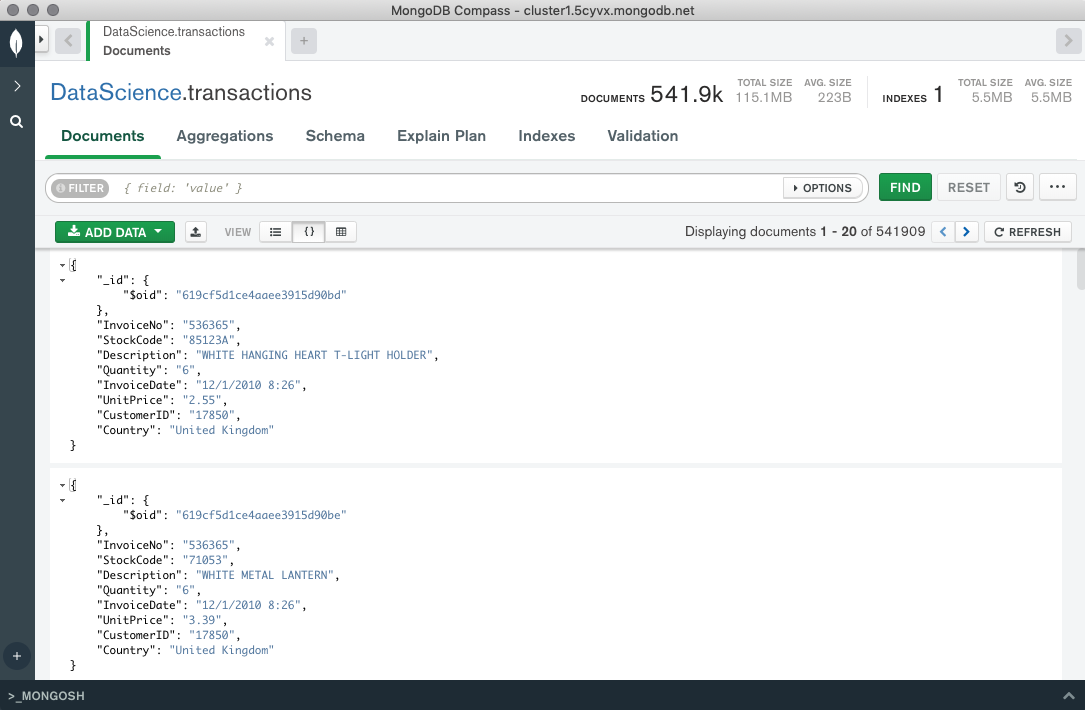

In [2]:
Image(filename='mydatabase1.jpg')

#### Insert new document

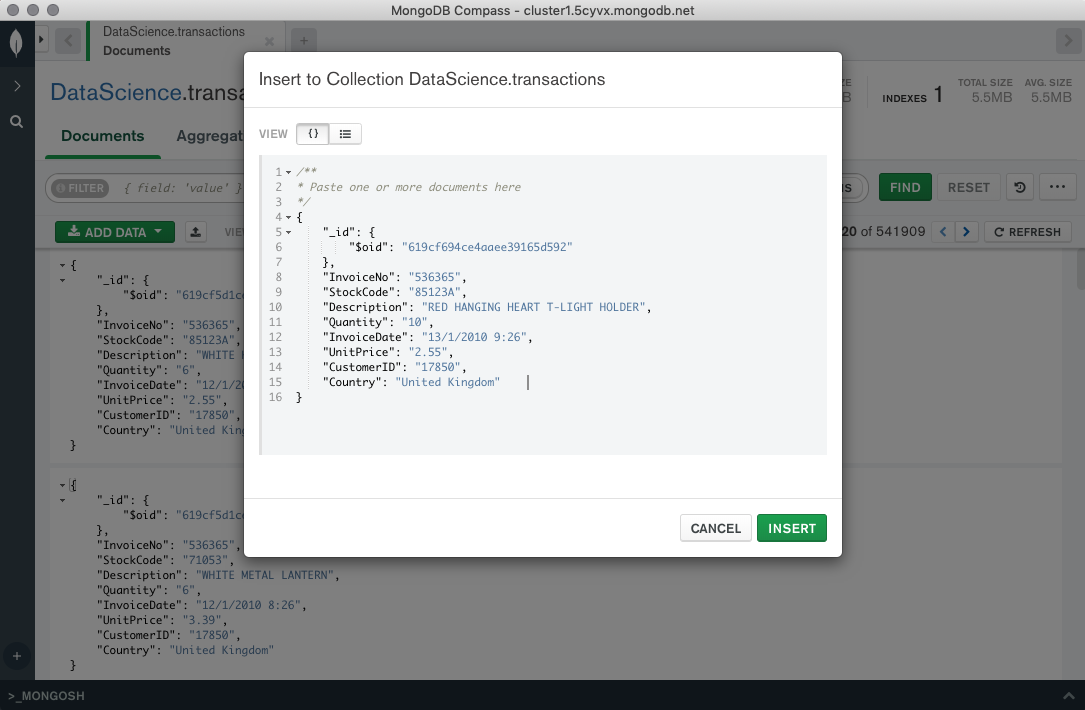

In [3]:
Image(filename='mydatabase2.jpg')

#### View Scheme - information about dataset

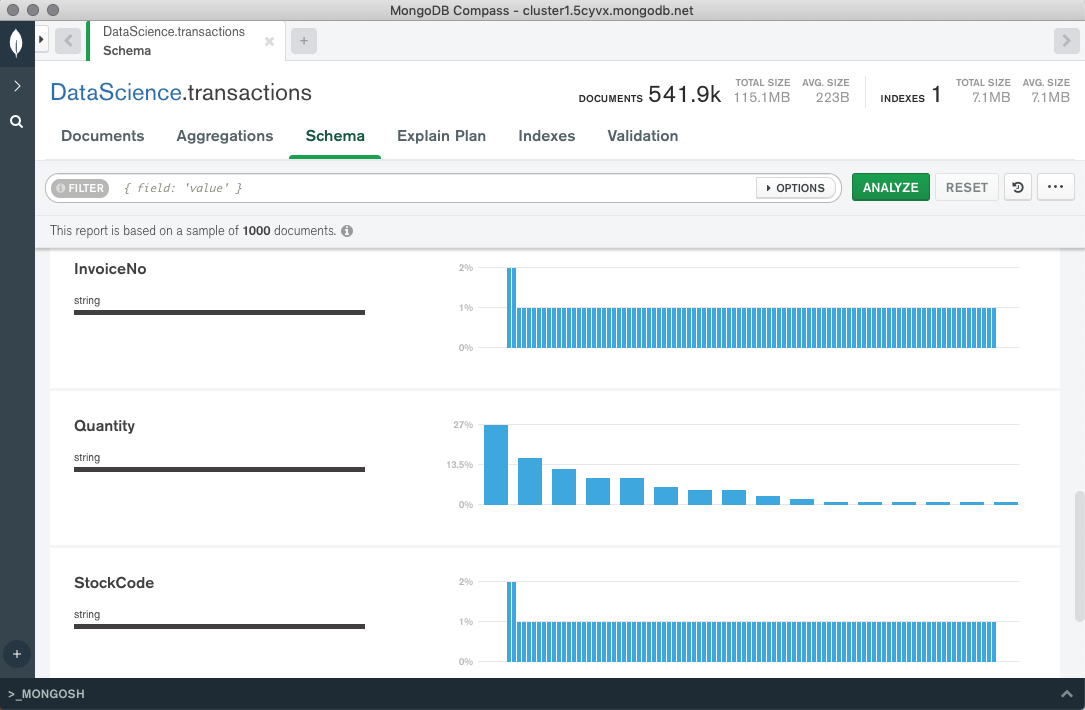

In [4]:
Image(filename='mydatabase3.jpg')

#### Search in database

How many documents there are for Invoice 536365?
- Filter: {"InvoiceNo":"536365"} - result 8 documents

How many documents there are for Customer 13047 with quantity 8?
- Filter: {"CustomerID":"13047","Quantity":"8"} - result 13 documents

How many documents has quantity 10?
- Filter: {"Quantity":"10",{ InvoiceNo: 1, Quantity: 1}} - result 22289 documents

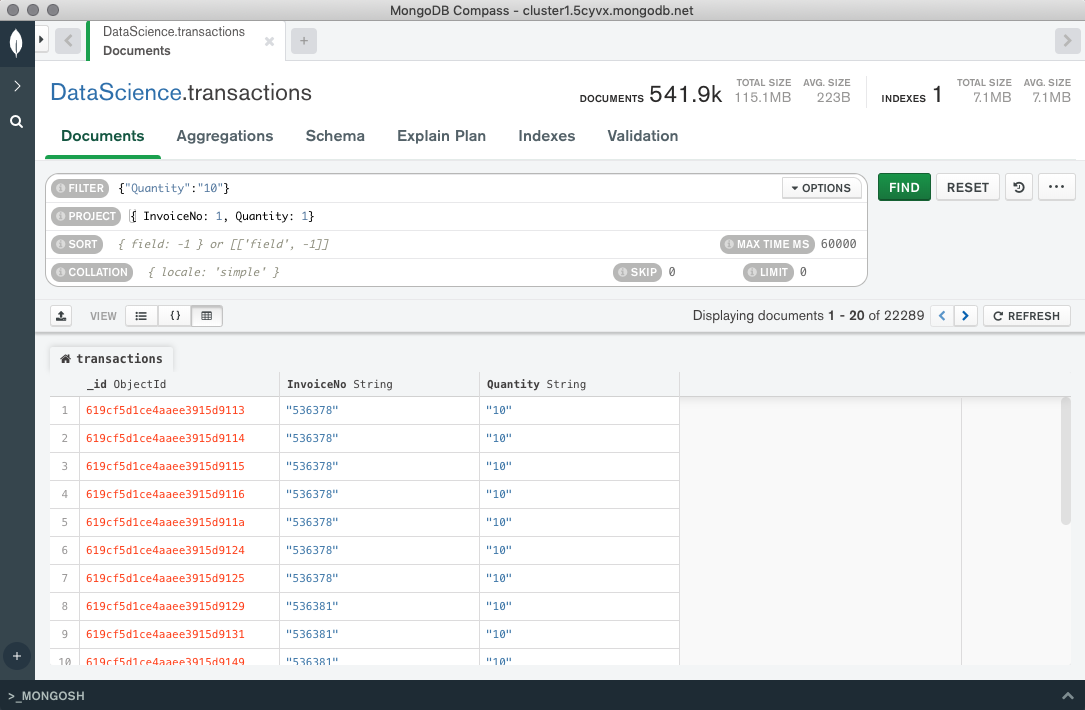

In [5]:
Image(filename='mydatabase4.jpg')

#### Update database with Studio3T

##### Update all invoice items with number 536365 to quantity 20.

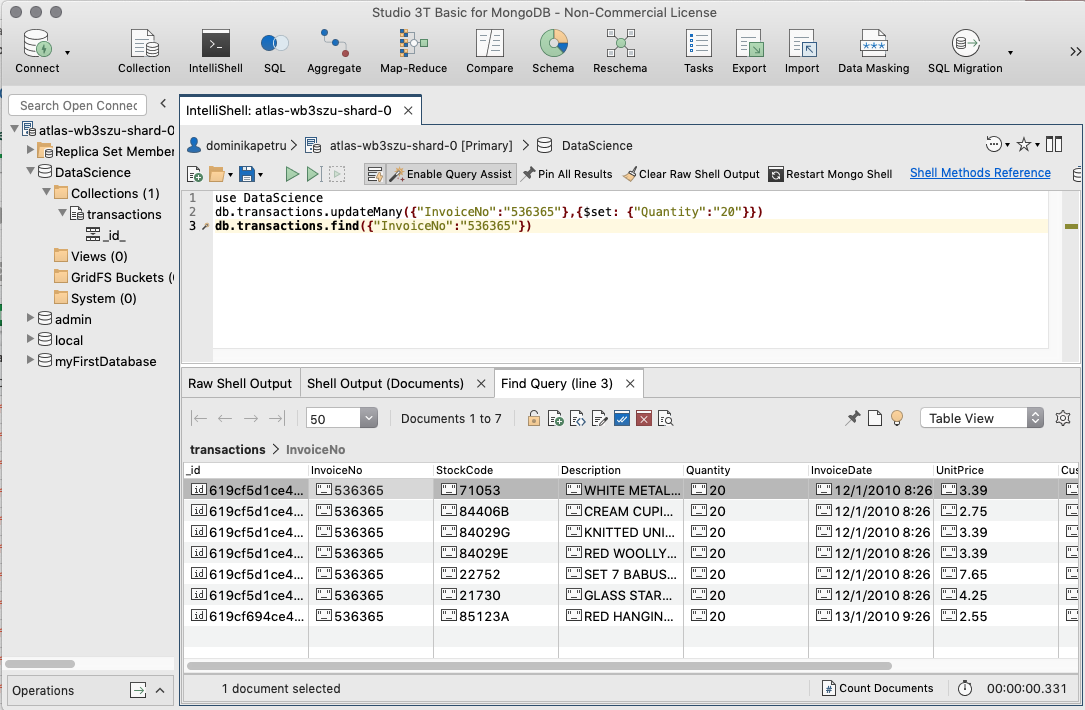

In [7]:
Image(filename='mydatabase5.jpg')

- Update, UpdateMany: add information which doesn't exist, insert or modify
- Replace, ReplaceMany: substitute for new one completely
- DeleteOne,DeleteMany: delete documents
- Operation for comparation: \$eq, \$ne, \$gt, \$gte, \$lt, \$lte

## Level 2

### Exercise 2

#### Connect to database NoSQL with PyMongo

1. Terminal type: mongod
2. Check connection

In [35]:
#connect to local server
client = pymongo.MongoClient("mongodb://localhost:27017/")

In [36]:
client.server_info()

{'version': '4.4.6',
 'gitVersion': '72e66213c2c3eab37d9358d5e78ad7f5c1d0d0d7',
 'modules': ['enterprise'],
 'allocator': 'system',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [4, 4, 6, 0],
 'openssl': {'running': 'Apple Secure Transport'},
 'buildEnvironment': {'distmod': '',
  'distarch': 'x86_64',
  'cc': '/Applications/Xcode10.2.0.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/clang: Apple LLVM version 10.0.1 (clang-1001.0.46.3)',
  'ccflags': '-isysroot /Applications/Xcode10.2.0.app/Contents/Developer/Platforms/MacOSX.platform/Developer/SDKs/MacOSX10.14.sdk -mmacosx-version-min=10.13 -target darwin17.0.0 -arch x86_64 -fno-omit-frame-pointer -fno-strict-aliasing -fasynchronous-unwind-tables -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-unused-private-field -Wno-deprecated-declarations -Wno-tautological-constant-out-of-range-compare -Wno-tautolog

In [37]:
client.list_database_names()

['admin', 'config', 'local']

In [38]:
db = client["DataScience"]
users = db["users"]

In [39]:
#insert many documents
user = [{"UserName": "Imma", "Salary":"25000","Age":"25","DNI":"123G"},
        {"UserName": "Carles", "Salary":"28000","Age":"45", "DNI":"123X"},
        {"UserName": "Daria", "Salary":"22000","Age":"20", "DNI":"123K"},
        {"UserName": "Eva", "Salary":"29000", "Age":"28","DNI":"123M"},
        {"UserName": "Anna", "Salary":"21000","Age":"32", "DNI":"123N"},
        {"UserName": "Alex", "Salary":"20000","Age":"25", "DNI":"123L"}]
users.insert_many(user)
results = list(users.find())

#print all documents
for x in results:
    print(x)

{'_id': ObjectId('61a5fdfa3be09cb36caecab7'), 'UserName': 'Imma', 'Salary': '25000', 'Age': '25', 'DNI': '123G'}
{'_id': ObjectId('61a5fdfa3be09cb36caecab8'), 'UserName': 'Carles', 'Salary': '28000', 'Age': '45', 'DNI': '123X'}
{'_id': ObjectId('61a5fdfa3be09cb36caecab9'), 'UserName': 'Daria', 'Salary': '22000', 'Age': '20', 'DNI': '123K'}
{'_id': ObjectId('61a5fdfa3be09cb36caecaba'), 'UserName': 'Eva', 'Salary': '29000', 'Age': '28', 'DNI': '123M'}
{'_id': ObjectId('61a5fdfa3be09cb36caecabb'), 'UserName': 'Anna', 'Salary': '21000', 'Age': '32', 'DNI': '123N'}
{'_id': ObjectId('61a5fdfa3be09cb36caecabc'), 'UserName': 'Alex', 'Salary': '20000', 'Age': '25', 'DNI': '123L'}


In [40]:
#delete document
query_delete = {"DNI":"123G"}
users.delete_one(query_delete)

In [41]:
#print all documents
results = list(users.find())
for x in results:
    print(x)

{'_id': ObjectId('61a5fdfa3be09cb36caecab8'), 'UserName': 'Carles', 'Salary': '28000', 'Age': '45', 'DNI': '123X'}
{'_id': ObjectId('61a5fdfa3be09cb36caecab9'), 'UserName': 'Daria', 'Salary': '22000', 'Age': '20', 'DNI': '123K'}
{'_id': ObjectId('61a5fdfa3be09cb36caecaba'), 'UserName': 'Eva', 'Salary': '29000', 'Age': '28', 'DNI': '123M'}
{'_id': ObjectId('61a5fdfa3be09cb36caecabb'), 'UserName': 'Anna', 'Salary': '21000', 'Age': '32', 'DNI': '123N'}
{'_id': ObjectId('61a5fdfa3be09cb36caecabc'), 'UserName': 'Alex', 'Salary': '20000', 'Age': '25', 'DNI': '123L'}


In [42]:
#one document with specific DNI
query = {"DNI":"123X"}
results = users.find(query)
for x in results:
    print(x)

{'_id': ObjectId('61a5fdfa3be09cb36caecab8'), 'UserName': 'Carles', 'Salary': '28000', 'Age': '45', 'DNI': '123X'}


In [43]:
#sort documents based on Salary
results = users.find().sort("Salary")
for x in results:
    print(x)

{'_id': ObjectId('61a5fdfa3be09cb36caecabc'), 'UserName': 'Alex', 'Salary': '20000', 'Age': '25', 'DNI': '123L'}
{'_id': ObjectId('61a5fdfa3be09cb36caecabb'), 'UserName': 'Anna', 'Salary': '21000', 'Age': '32', 'DNI': '123N'}
{'_id': ObjectId('61a5fdfa3be09cb36caecab9'), 'UserName': 'Daria', 'Salary': '22000', 'Age': '20', 'DNI': '123K'}
{'_id': ObjectId('61a5fdfa3be09cb36caecab8'), 'UserName': 'Carles', 'Salary': '28000', 'Age': '45', 'DNI': '123X'}
{'_id': ObjectId('61a5fdfa3be09cb36caecaba'), 'UserName': 'Eva', 'Salary': '29000', 'Age': '28', 'DNI': '123M'}


In [44]:
#change values
query = {"UserName":"Alex"}
new_values = {"$set": {"Salary":"35000"}}
users.update_one(query, new_values)

In [45]:
#print changed document
results = users.find(query)
for x in results:
    print(x)

{'_id': ObjectId('61a5fdfa3be09cb36caecabc'), 'UserName': 'Alex', 'Salary': '35000', 'Age': '25', 'DNI': '123L'}


In [46]:
#insert more documents
user = [{"UserName": "Julia", "Salary":"21000","Age":"27","DNI":"123A"},
        {"UserName": "Ramon", "Salary":"28000","Age":"30", "DNI":"123B"},
        {"UserName": "Domi", "Salary":"22000","Age":"46", "DNI":"123C"},
        {"UserName": "Eni", "Salary":"30000", "Age":"50","DNI":"123D"}]
users.insert_many(user)

In [31]:
#delete collection
#db.users.drop()

## Level 3

### Exercise 3

#### Generate statistical report

In [47]:
#prints database stats for "DataScience"
db.command("dbstats")

{'db': 'DataScience',
 'collections': 1,
 'views': 0,
 'objects': 9,
 'avgObjSize': 85.33333333333333,
 'dataSize': 768.0,
 'storageSize': 4096.0,
 'indexes': 1,
 'indexSize': 4096.0,
 'totalSize': 8192.0,
 'scaleFactor': 1.0,
 'fsUsedSize': 156837654528.0,
 'fsTotalSize': 199986491392.0,
 'ok': 1.0}

In [48]:
#prints collection-level stats for collection "users" under "DataScience"
db.command("collstats", "users")

{'ns': 'DataScience.users',
 'size': 768,
 'count': 9,
 'avgObjSize': 85,
 'storageSize': 4096,
 'freeStorageSize': 0,
 'capped': False,
 'wiredTiger': {'metadata': {'formatVersion': 1},
  'creationString': 'access_pattern_hint=none,allocation_size=4KB,app_metadata=(formatVersion=1),assert=(commit_timestamp=none,durable_timestamp=none,read_timestamp=none,write_timestamp=off),block_allocation=best,block_compressor=snappy,cache_resident=false,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=false,extractor=,format=btree,huffman_key=,huffman_value=,ignore_in_memory_cache_size=false,immutable=false,import=(enabled=false,file_metadata=,repair=false),internal_item_max=0,internal_key_max=0,internal_key_truncate=true,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=true),lsm=(auto_throttle=true,bloom=true,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=fals

In [49]:
#create dataframe with pandas
results = users.find({})
df = pd.DataFrame(list(results))
df.drop(['_id'], axis=1, inplace=True)

In [50]:
df

,UserName,Salary,Age,DNI
0,Carles,28000,45,123X
1,Daria,22000,20,123K
2,Eva,29000,28,123M
3,Anna,21000,32,123N
4,Alex,35000,25,123L
5,Julia,21000,27,123A
6,Ramon,28000,30,123B
7,Domi,22000,46,123C
8,Eni,30000,50,123D


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserName  9 non-null      object
 1   Salary    9 non-null      object
 2   Age       9 non-null      object
 3   DNI       9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [52]:
#change data type
df = df.astype({'Salary': int, "Age": int})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UserName  9 non-null      object
 1   Salary    9 non-null      int64 
 2   Age       9 non-null      int64 
 3   DNI       9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


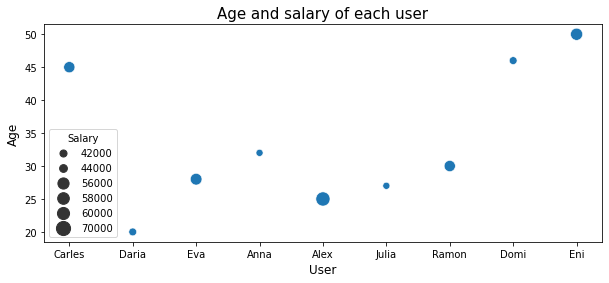

In [54]:
plt.figure(figsize =(10, 4))

size=df['Salary']*2

ax = sns.scatterplot(data=df,x="UserName",y="Age",size=size,sizes=(50, 200))
plt.title('Age and salary of each user', fontsize = 15)
plt.xlabel('User',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

#### Notes
* MongoDB
    - https://www.presentslide.in/2019/08/introduction-mongodb-pymongo-python.html
    - https://www.mongodb.com/nosql-explained
    - https://www.w3schools.com/python/python_mongodb_getstarted.asp
    - https://docs.mongodb.com/manual/tutorial/
    - https://docs.spring.io/spring-data/mongodb/docs/current/reference/html/#reference
    - info installation: https://medium.com/khojchakra/install-mongodb-without-homebrew-on-mac-os-2a98b68ab09c
* Other tools
    - Studio 3T